## Purpose:
This section imports necessary libraries:
numpy: For numerical calculations (e.g., Mean Squared Error).
pandas: For handling data as DataFrames.
sklearn: For machine learning models and datasets.
Loads the Diabetes dataset, a built-in dataset in sklearn containing:
X: Features (predictor variables).
y: Target (response variable).
Converts the dataset into a Pandas DataFrame for easier handling and to leverage column names.




In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import Ridge, Lasso, ElasticNet 
from sklearn.metrics import mean_squared_error, r2_score 
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
#Get Diabetes Data 
 
bc = datasets.load_diabetes() 
X = pd.DataFrame(bc.data, columns=bc.feature_names)
y = pd.Series(bc.target, name="Target")
print(bc.DESCR) 

# Add the target variable to the DataFrame
df = X.copy()
df['Target'] = y


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# 1. Descriptive Statistics
print("Descriptive Statistics for Each Variable:\n")
print(df.describe())

Descriptive Statistics for Each Variable:

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4


Generating Histograms...


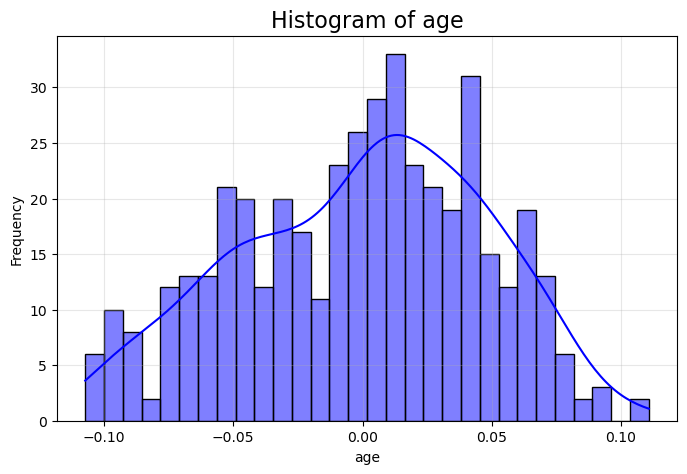

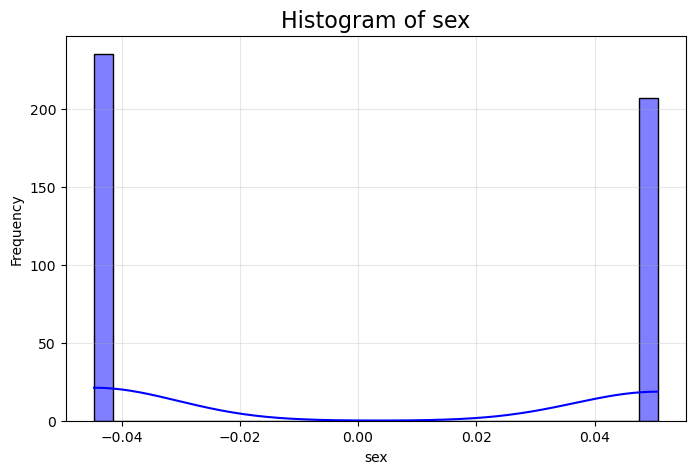

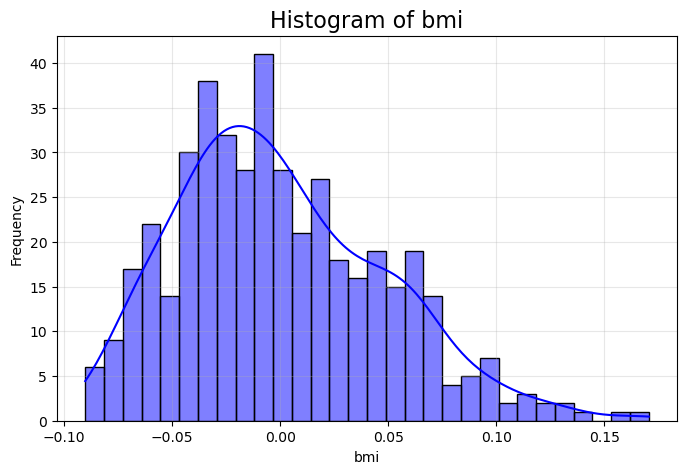

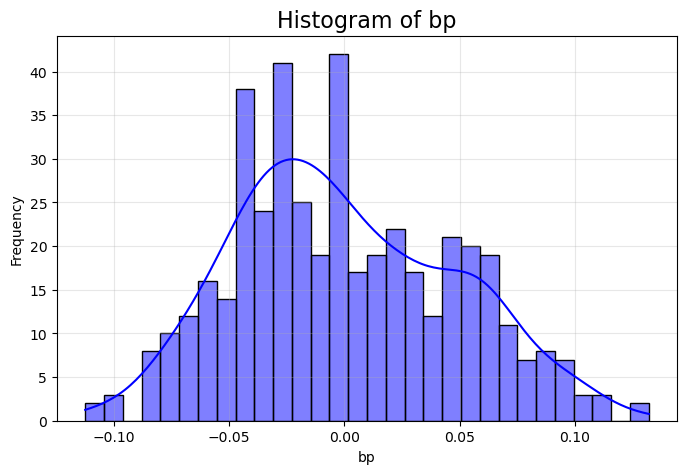

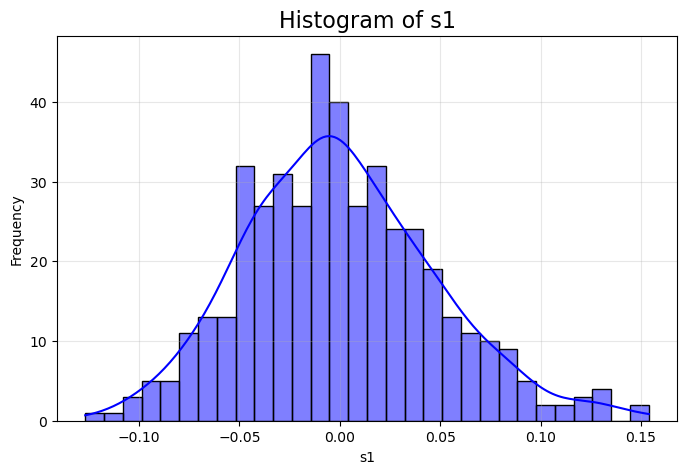

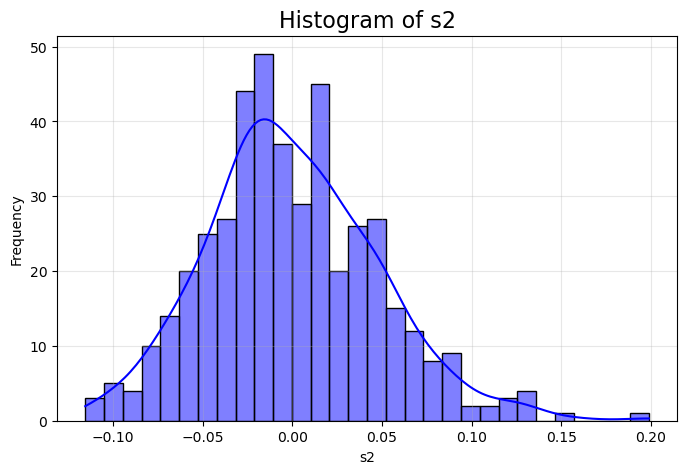

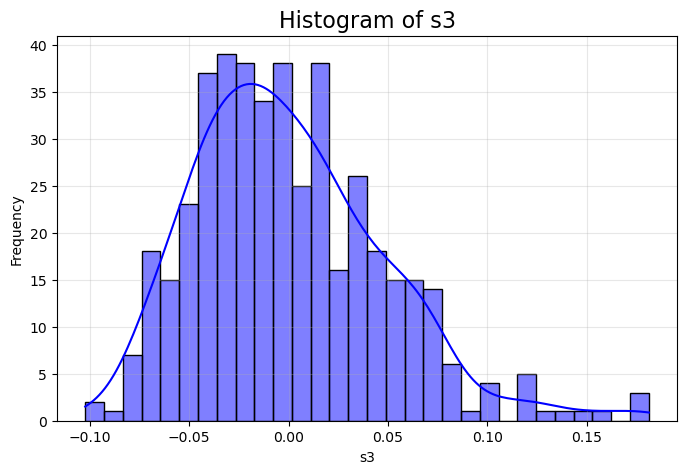

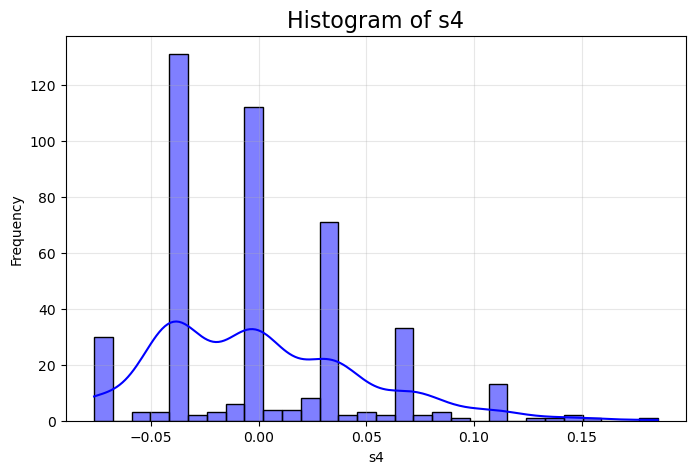

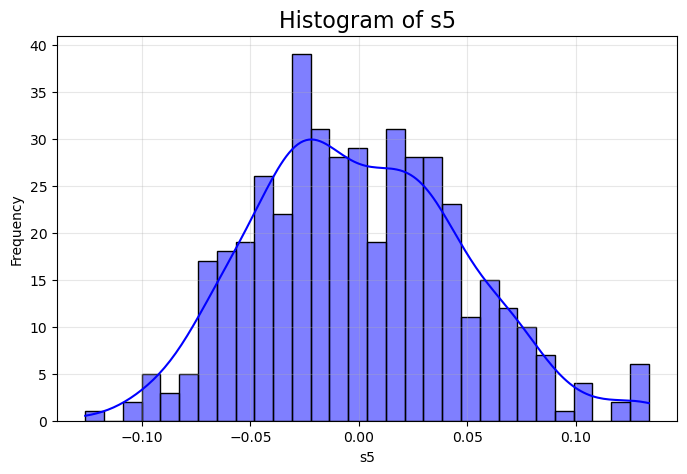

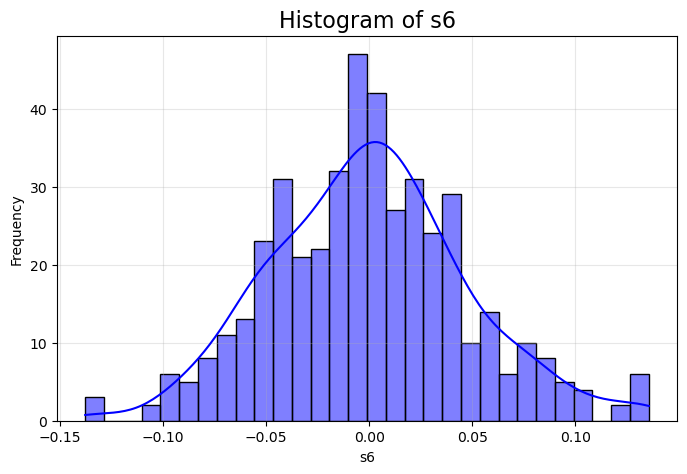

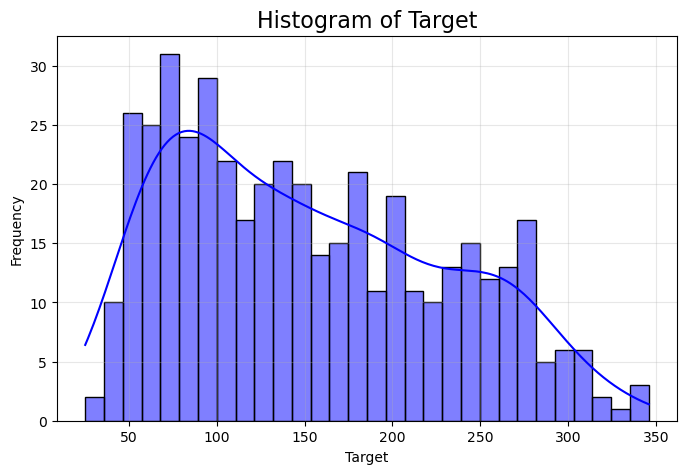

In [5]:
# 2. Histograms for Each Variable
print("\nGenerating Histograms...")
for column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Histogram of {column}", fontsize=16)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()


Generating Boxplots...


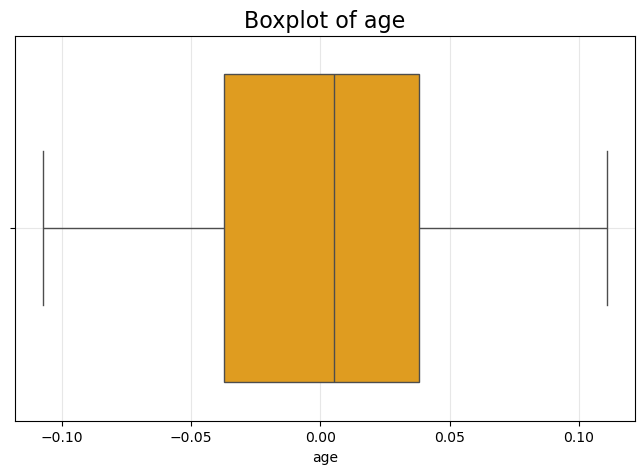

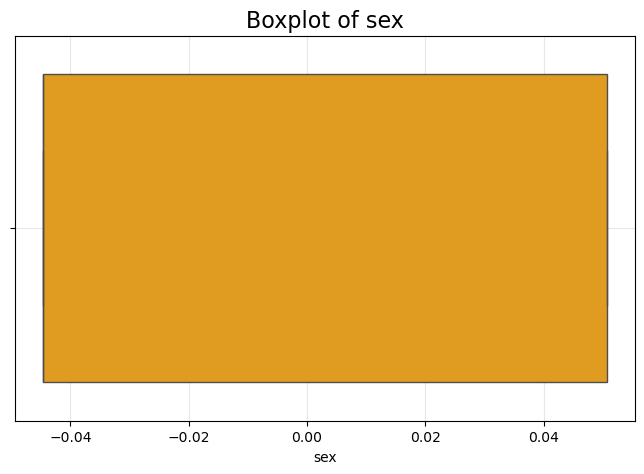

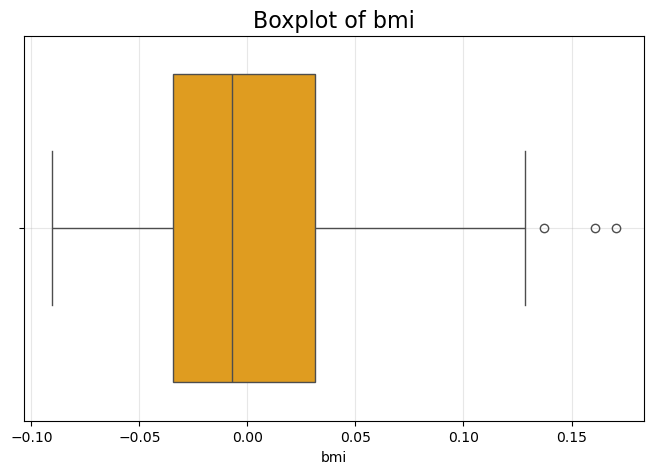

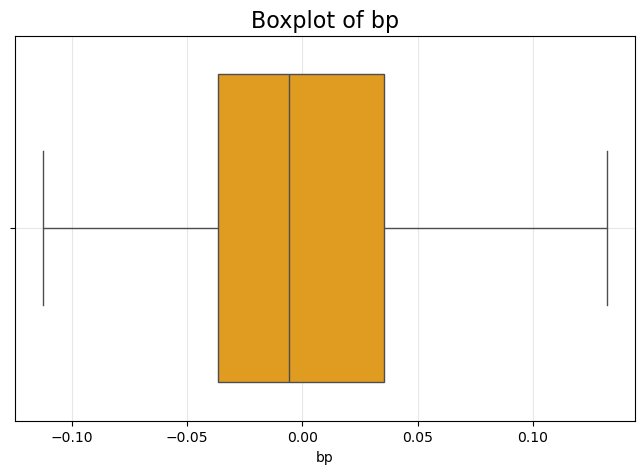

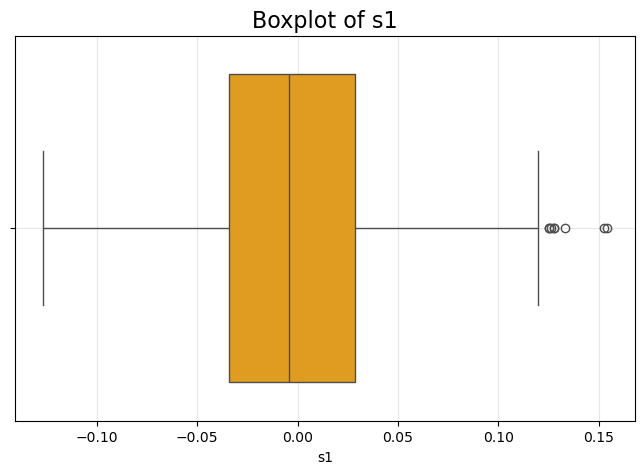

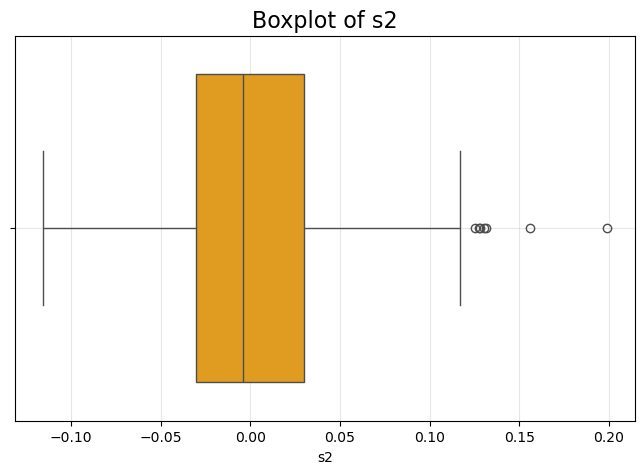

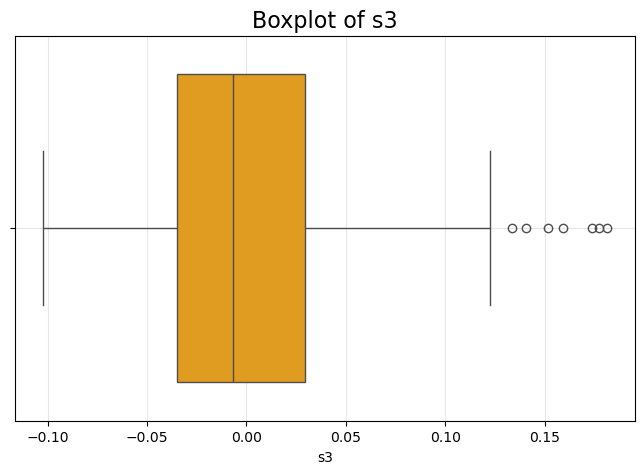

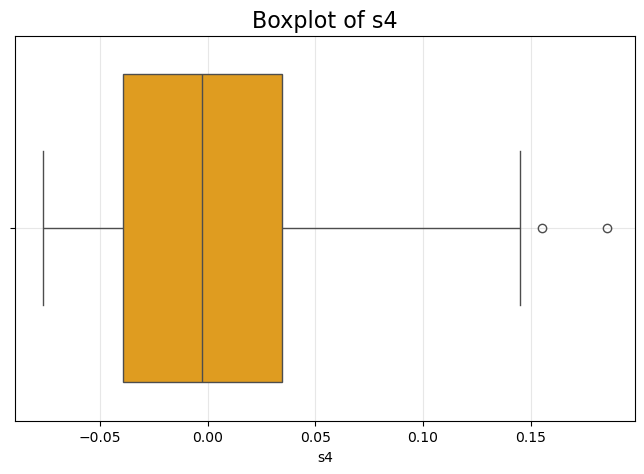

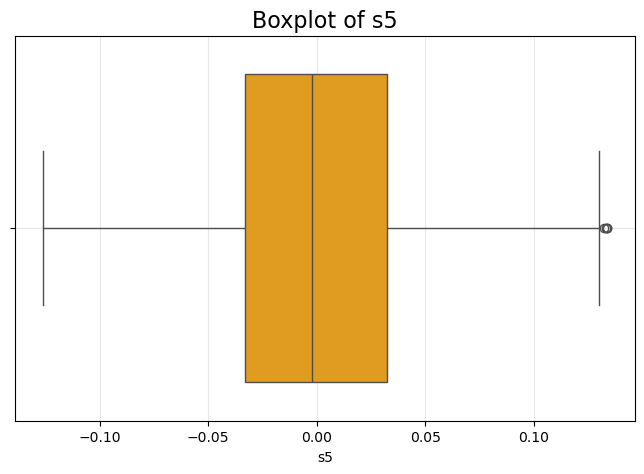

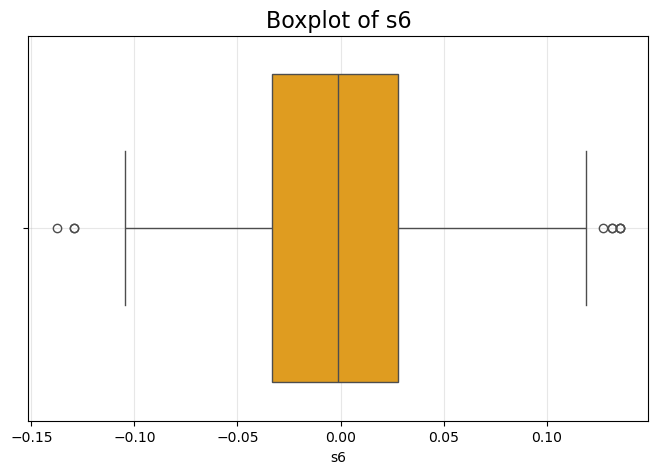

In [6]:
# 3. Boxplots for Each Variable
print("\nGenerating Boxplots...")
for column in X.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[column], color='orange')
    plt.title(f"Boxplot of {column}", fontsize=16)
    plt.xlabel(column)
    plt.grid(alpha=0.3)
    plt.show()


Generating Pairplots with Target...


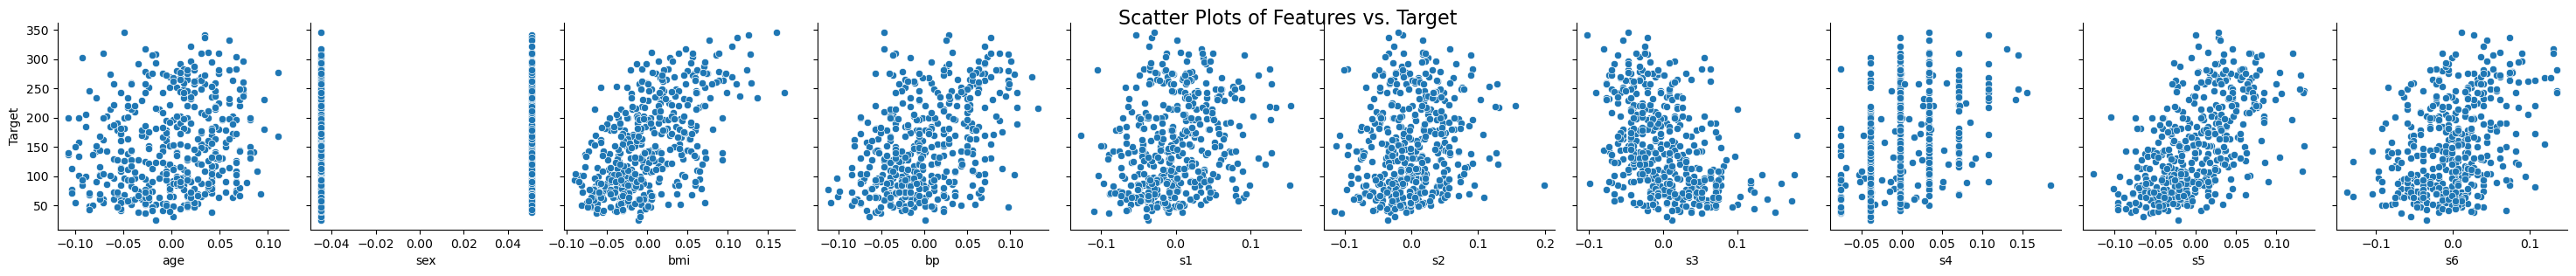

In [7]:
# 4. Pairplots to Explore Relationships with the Target
print("\nGenerating Pairplots with Target...")
sns.pairplot(df, y_vars='Target', x_vars=bc.feature_names, kind='scatter', height=3)
plt.suptitle("Scatter Plots of Features vs. Target", y=1.02, fontsize=16)
plt.show()

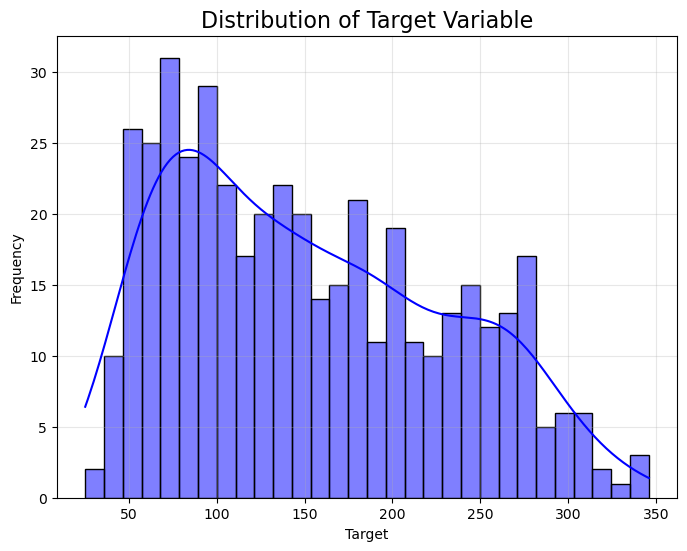

In [8]:
# 2. Histogram of Target Variable
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, bins=30, color='blue')
plt.title("Distribution of Target Variable", fontsize=16)
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


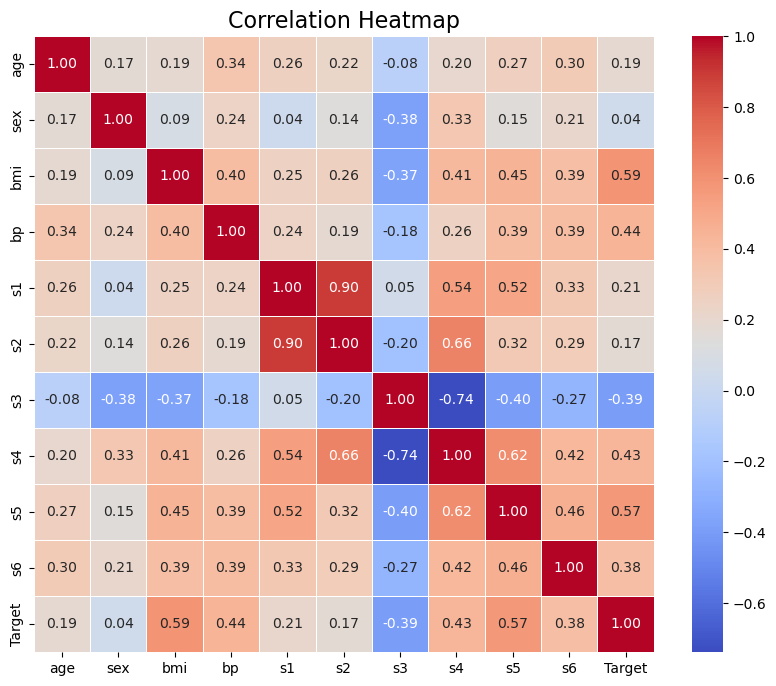

In [9]:
# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## Scaling

Creates an instance of the StandardScaler class from sklearn. StandardScaler is used to standardize the dataset by scaling each feature to have a mean of 0 and a standard deviation of 1.

Why It's Important:
Standardization is often crucial for machine learning algorithms (e.g., regression, SVMs, and KNN), as these models are sensitive to feature scales. Example: If one feature has values in the range 0–1 and another in the range 100–1000, the model may give undue importance to the larger-scaled feature.

In [10]:


scaler=StandardScaler() 
diabetes= pd.DataFrame(bc.data) 
diabetes.columns = bc.feature_names 
diabetes['y']=pd.Series(bc.target) 
diabetes 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Splitting

Splits the dataset into: x_train, y_train: Training data used to fit the model. x_test, y_test: Testing data used to evaluate the model. test_size=0.2: Reserves 20% of the data for testing. random_state=42: Ensures reproducibility by setting a fixed random seed.

Inputs: A machine learning model object (model). Steps: Fit: Trains the model on the training data (x_train, y_train). Predict: Generates predictions (y_pred) for the test data (x_test). Evaluate: Computes Mean Squared Error (MSE), a common regression metric: Coefficients: Extracts feature importance (model.coef_) and pairs it with column names from the dataset into a DataFrame. Returns: A DataFrame showing each feature’s coefficient.

We will do this for each regression, and ensure that we get the same splitting using the random_state instead of a function

## Purpose:
Initializes three linear regression models: Ridge: Adds L2 regularization to reduce overfitting by penalizing large coefficients. Lasso: Adds L1 regularization, which can shrink some coefficients to exactly zero (feature selection). ElasticNet: Combines L1 and L2 regularization for a balance. Calls the myf function for each model to: Fit and evaluate the model. Print MSE and feature coefficients.

/var/folders/cb/43sb4l690gv2jy9glpc32b9w0000gn/T/ipykernel_22612/2957557543.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")


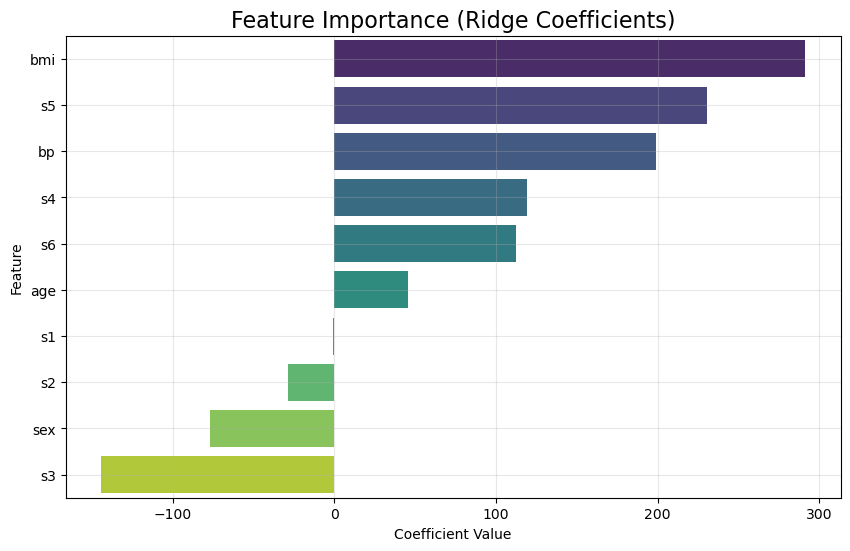

Ridge()

In [11]:
# 4. Feature Importance (Using Coefficients from a Ridge Regression Model)
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression model
model = Ridge()
model.fit(x_train, y_train)

# Plot Feature Importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")
plt.title("Feature Importance (Ridge Coefficients)", fontsize=16)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(alpha=0.3)
plt.show()

model.fit(x_train, y_train)
    



Mean Squared Error (MSE): 3077.4159
Root Mean Squared Error (RMSE): 55.4745
R² (coefficient of determination): 0.4192


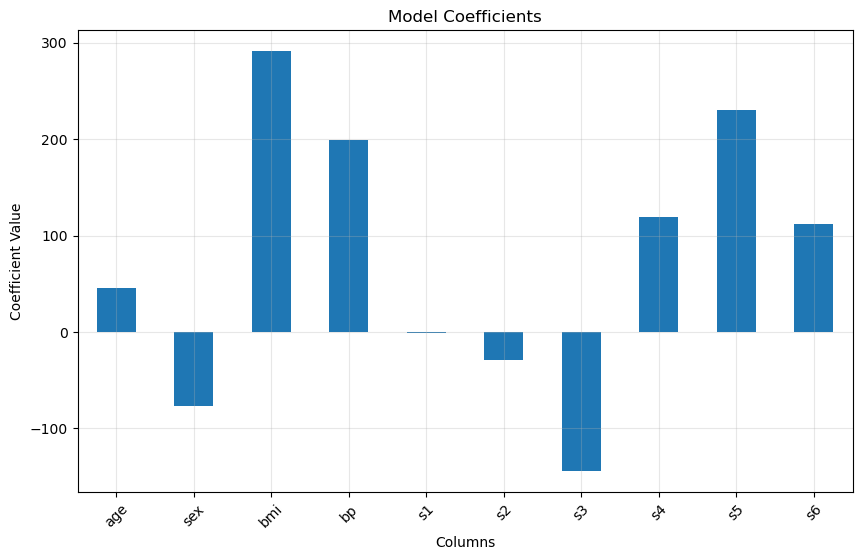

In [12]:
# Predict on the test set
y_pred = model.predict(x_test)
    
MSE = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error (MSE): {MSE:.4f}")
    
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(MSE)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    
# Calculate R² (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R² (coefficient of determination): {r2:.4f}")
    
# Create and return coefficients DataFrame if applicable
if hasattr(model, 'coef_'):
    mod_coeff = pd.DataFrame()
    mod_coeff["Columns"] = X.columns
    mod_coeff['Coefficient Estimate'] = pd.Series(model.coef_)
        
    # Plot coefficients
    mod_coeff.plot(x='Columns', y='Coefficient Estimate', kind='bar', legend=False, figsize=(10, 6), title="Model Coefficients")
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.show()


/var/folders/cb/43sb4l690gv2jy9glpc32b9w0000gn/T/ipykernel_22612/3846833120.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")


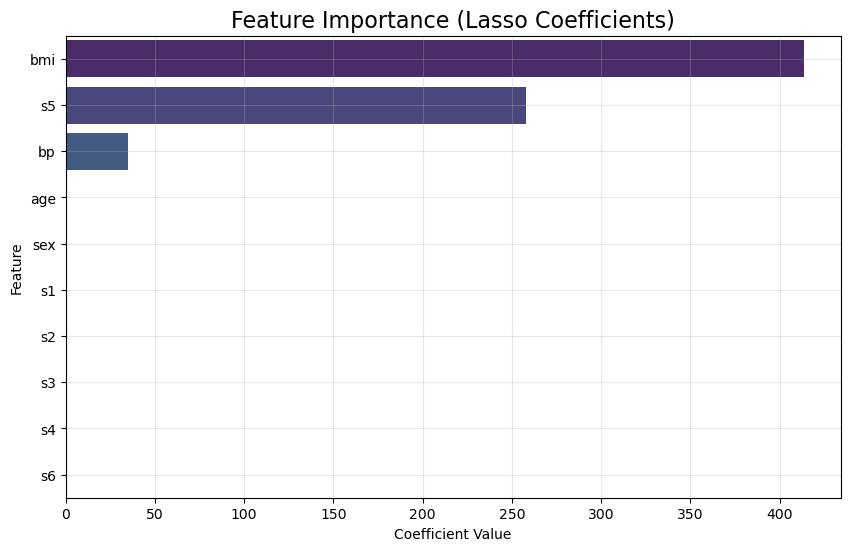

In [13]:
# 4. Feature Importance (Using Coefficients from a Lasso Regression Model)
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression model
model = Lasso()
model.fit(x_train, y_train)

# Plot Feature Importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")
plt.title("Feature Importance (Lasso Coefficients)", fontsize=16)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(alpha=0.3)
plt.show()



Mean Squared Error (MSE): 3403.5757
Root Mean Squared Error (RMSE): 58.3402
R² (coefficient of determination): 0.3576


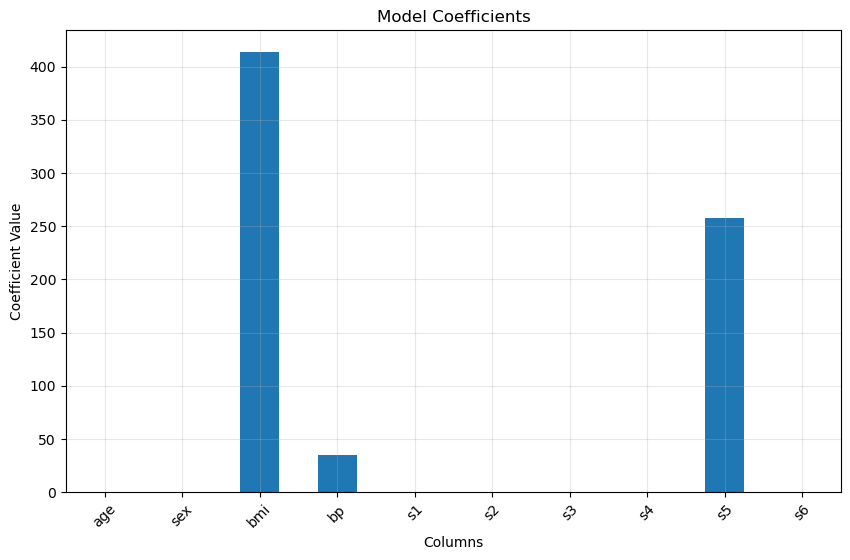

In [14]:
# Predict on the test set
y_pred = model.predict(x_test)
    
MSE = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error (MSE): {MSE:.4f}")
    
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(MSE)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    
# Calculate R² (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R² (coefficient of determination): {r2:.4f}")
    
# Create and return coefficients DataFrame if applicable
if hasattr(model, 'coef_'):
    mod_coeff = pd.DataFrame()
    mod_coeff["Columns"] = X.columns
    mod_coeff['Coefficient Estimate'] = pd.Series(model.coef_)
        
    # Plot coefficients
    mod_coeff.plot(x='Columns', y='Coefficient Estimate', kind='bar', legend=False, figsize=(10, 6), title="Model Coefficients")
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.show()


## Purpose:
Initializes three linear regression models:
Ridge: Adds L2 regularization to reduce overfitting by penalizing large coefficients.
Lasso: Adds L1 regularization, which can shrink some coefficients to exactly zero (feature selection).
ElasticNet: Combines L1 and L2 regularization for a balance.
Calls the myf function for each model to:
Fit and evaluate the model.
Print MSE and feature coefficients.

/var/folders/cb/43sb4l690gv2jy9glpc32b9w0000gn/T/ipykernel_22612/3307291525.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")


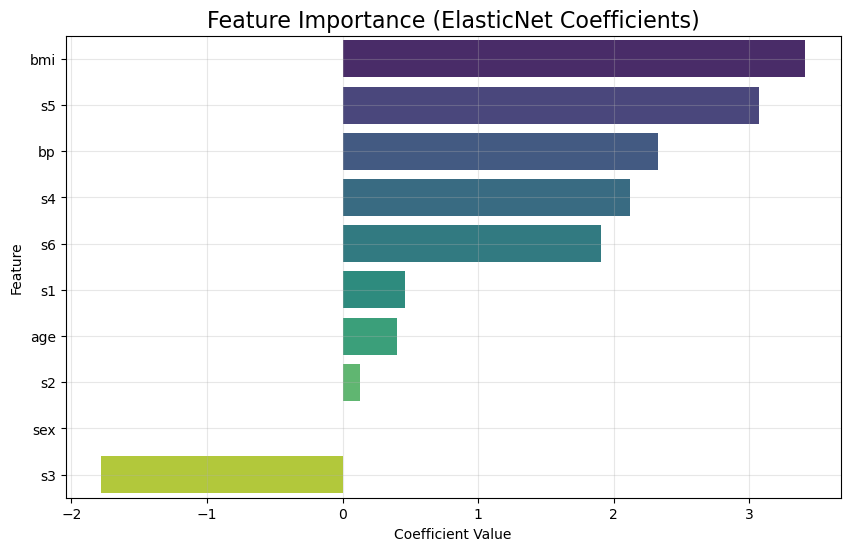

In [15]:
# 4. Feature Importance (Using Coefficients from a Elastic Net Regression Model)
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression model
model = ElasticNet()
model.fit(x_train, y_train)

# Plot Feature Importance
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.coef_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=coefficients, palette="viridis")
plt.title("Feature Importance (ElasticNet Coefficients)", fontsize=16)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(alpha=0.3)
plt.show()


Mean Squared Error (MSE): 5311.2128
Root Mean Squared Error (RMSE): 72.8781
R² (coefficient of determination): -0.0025


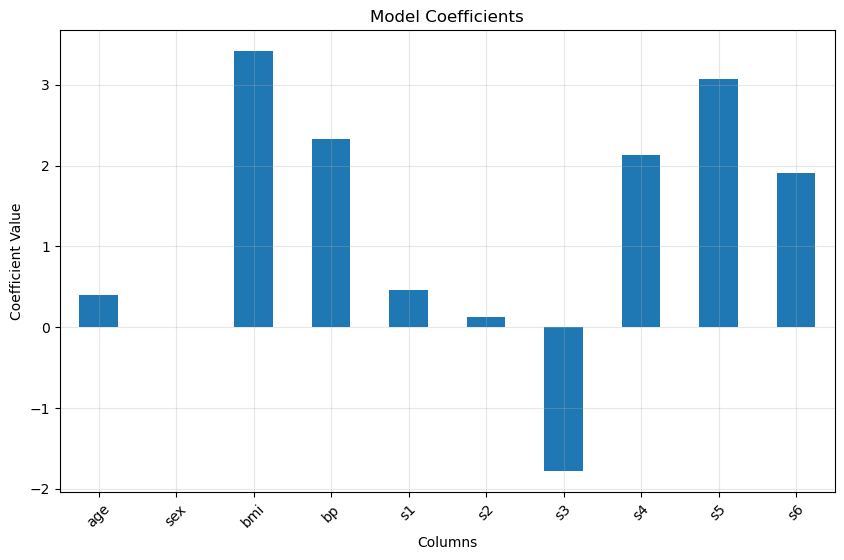

In [16]:
# Predict on the test set
y_pred = model.predict(x_test)
    
MSE = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error (MSE): {MSE:.4f}")
    
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(MSE)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    
# Calculate R² (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R² (coefficient of determination): {r2:.4f}")
    
# Create and return coefficients DataFrame if applicable
if hasattr(model, 'coef_'):
    mod_coeff = pd.DataFrame()
    mod_coeff["Columns"] = X.columns
    mod_coeff['Coefficient Estimate'] = pd.Series(model.coef_)
        
    # Plot coefficients
    mod_coeff.plot(x='Columns', y='Coefficient Estimate', kind='bar', legend=False, figsize=(10, 6), title="Model Coefficients")
    plt.ylabel('Coefficient Value')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.show()